In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# 读取图像
img = cv2.imread("./3.jpg", cv2.IMREAD_GRAYSCALE)

In [61]:
# 傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 构建频率域中心点的网格
rows, cols = img.shape
crow, ccol = rows//2, cols//2
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x -= ccol
y -= crow

In [62]:
# 计算每个网格点到中心点的距离
d = np.sqrt(x**2 + y**2)

In [79]:
# 计算高斯低通滤波器的权值
D0 = 30
H = np.exp(-d**2 / (2 * D0**2))

In [80]:
# 将高斯低通滤波器的权值乘以频率域中的像素值
fshift_filtered = H * fshift

In [81]:
# 反傅里叶变换
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(np.clip(img_filtered, 0, 255))  # 将像素值限制在0到255之间

In [82]:
img_filtered

array([[47, 47, 48, ..., 45, 46, 46],
       [44, 45, 46, ..., 42, 43, 44],
       [42, 43, 44, ..., 40, 41, 41],
       ...,
       [54, 54, 54, ..., 53, 53, 54],
       [52, 52, 52, ..., 51, 51, 51],
       [49, 50, 50, ..., 48, 48, 49]], dtype=uint8)

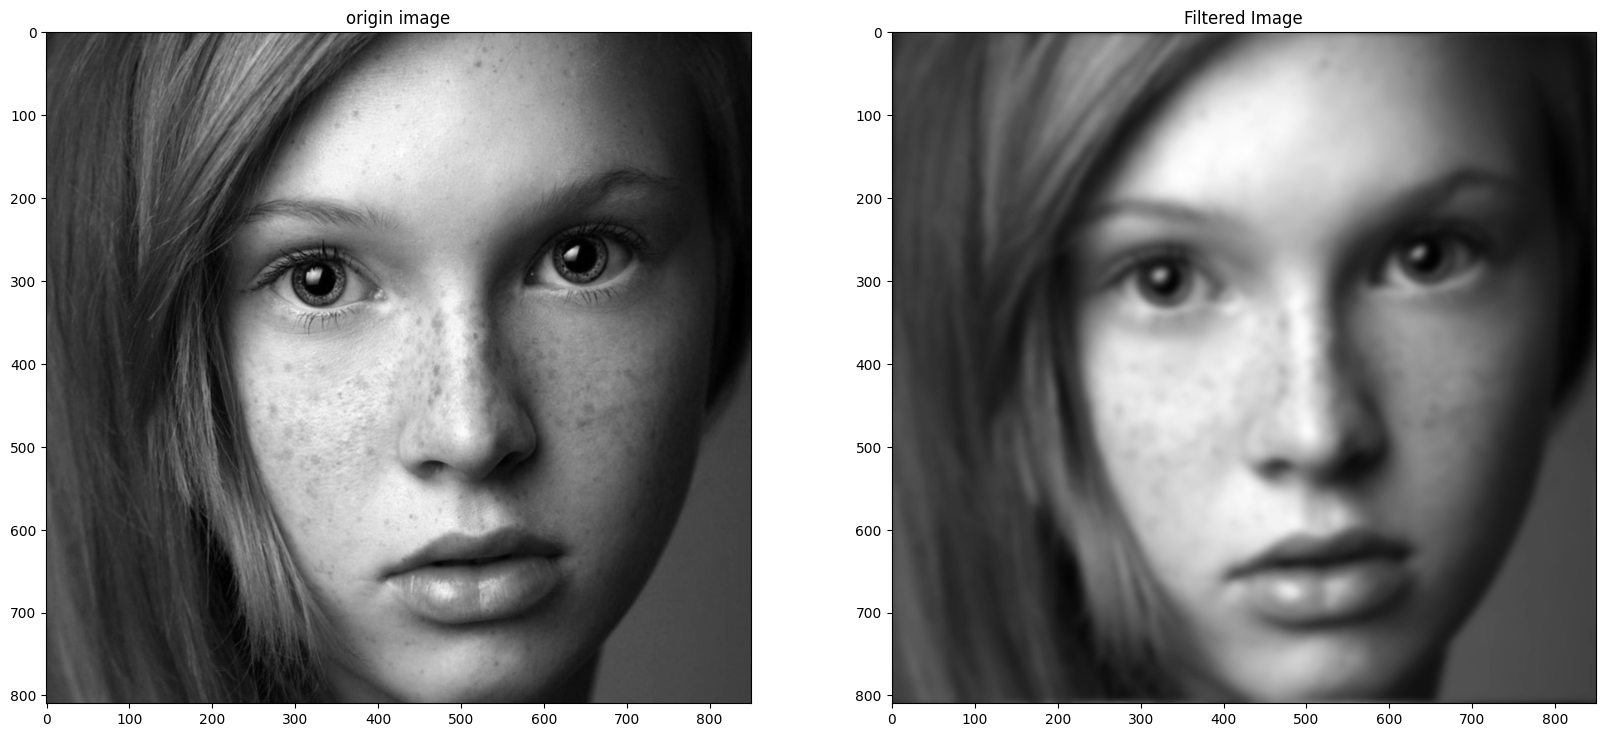

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('origin image')
axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')
plt.show()

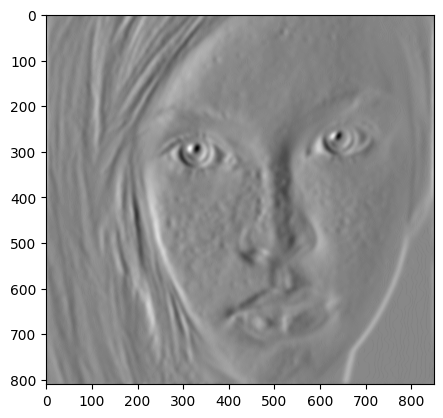

In [84]:
# 用灰底显示
sobelx = cv2.Sobel(img_filtered, cv2.CV_16S, 1, 0, ksize=0)
plt.imshow(sobelx,cmap='gray')
plt.show()

In [85]:
# 反傅里叶变换
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(np.clip(img_filtered, 0, 255))  # 将像素值限制在0到255之间

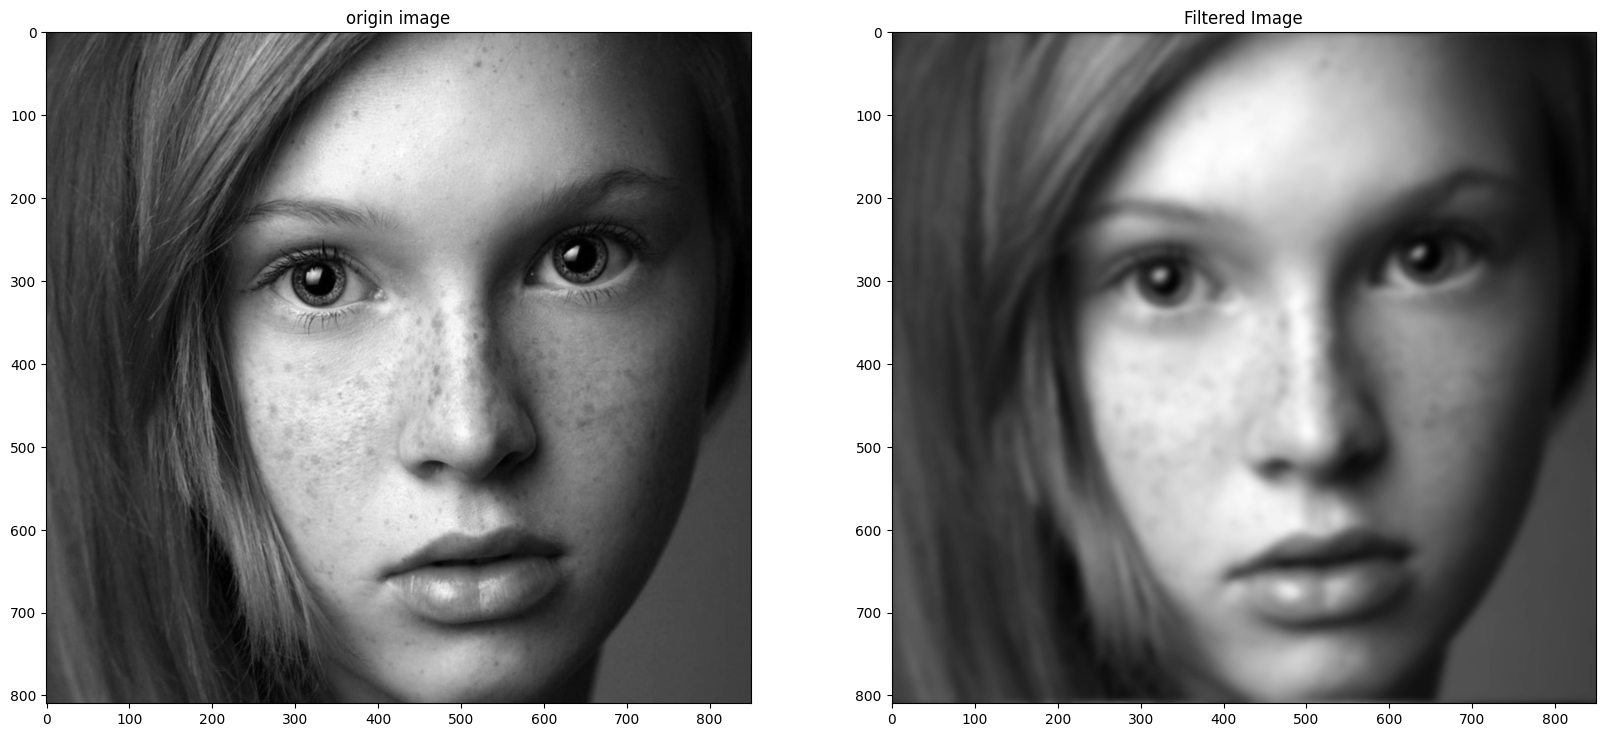

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('origin image')
axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')
plt.show()